___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg

In [5]:
df = pl.read_csv('../../DATA/moviereviews.csv')

In [6]:
df.head()

label,review
str,str
"""neg""","""how do films like mouse hunt g…"
"""neg""","""some talented actresses are bl…"
"""pos""","""this has been an extraordinary…"
"""pos""","""according to hollywood movies …"
"""neg""","""my first press screening of 19…"


**TASK: Check to see if there are any missing values in the dataframe.**

In [9]:
#CODE HERE

In [10]:
df.null_count()

label,review
u32,u32
0,35


**TASK: Remove any reviews that are NaN**

In [15]:
df = df.filter(
    pl.col("review").is_not_null()
)

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [30]:
df = df.filter(~pl.col("review").str.strip_chars().eq(""))

In [31]:
df

label,review
str,str
"""neg""","""how do films like mouse hunt g…"
"""neg""","""some talented actresses are bl…"
"""pos""","""this has been an extraordinary…"
"""pos""","""according to hollywood movies …"
"""neg""","""my first press screening of 19…"
…,…
"""pos""","""i like movies with albert broo…"
"""pos""","""it might surprise some to know…"
"""pos""","""the verdict : spine-chilling d…"


**TASK: Confirm the value counts per label:**

In [38]:
#CODE HERE

In [39]:
df['label'].value_counts()

label,count
str,u32
"""pos""",969
"""neg""",969


## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [45]:
#CODE HERE

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
df_negative = df.filter(pl.col("label") == "neg")

In [69]:
reviews_list = df_negative["review"].to_list()

In [42]:
count_vectorize = CountVectorizer(stop_words='english')

In [51]:
matrix = count_vectorize.fit_transform(df['review'])

In [71]:
features = count_vectorize.get_feature_names_out()

In [73]:
word_counts = matrix.sum(axis=0)

In [75]:
word_counts = word_counts.A1

In [77]:
freqs = list(zip(features, word_counts))

In [79]:
top_20 = sorted(freqs, key=lambda x: x[1], reverse=True)[:20]

In [81]:
print("Top 20 words used in Negative reviews:")
for word, count in top_20:
    print(f"{word}: {count}")

Top 20 words used in Negative reviews:
film: 9065
movie: 5520
like: 3529
just: 2753
good: 2310
time: 2302
story: 2107
character: 1963
characters: 1795
way: 1598
make: 1577
life: 1536
does: 1494
films: 1474
really: 1474
plot: 1465
little: 1447
people: 1397
bad: 1336
man: 1335


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [ ]:
#CODE HERE

In [82]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [ ]:
#CODE HERE

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [84]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [77]:
#CODE HERE

In [85]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [86]:
predictions = pipe.predict(X_test)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



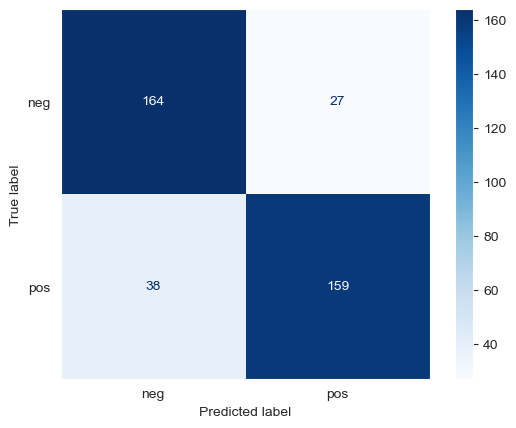

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

## Great job!